In [1]:
import pandas as pd
from utils import load_config, MongoDBSession

In [3]:
# parameter
query_cfg_path = './config/query.yaml'
rec_result_file = 'xindong_head-20221220.csv.csv'
topK = 10

In [4]:
# load query config
query_config = load_config(query_cfg_path)

In [5]:
# init mongoDB
mongodb_session = MongoDBSession(query_config['connect_settings'])
database_names = mongodb_session.database_names
database_names

['xindong123', 'xindong_inference', 'xindong']

In [6]:
# get xindong.media(my)(id, title, tags)
mongodb_session.init_db(db_name='xindong')
media_cl = mongodb_session.query(collect_name='media')

ready db(=xindong)....


In [ ]:
# build item2info
item2info = dict()
for record in media_cl:
    item2info[record['ITEM_ID']] = {
                        'title' : record['title'],
                        'tags' : record['tags-data']
                        }

In [ ]:
# get All/user2meta_history data
mongodb_session.init_db(db_name='xindong_inference')
user2meta_history_cl = mongodb_session.query(collect_name='All/user2meta_history')

In [ ]:
# build user2meta_history
user2meta_history = dict()
for record in user2meta_history_cl:
    user2meta_history[record['USER_ID']] = record['meta_history']

In [ ]:
# build item2info
dat = {'title' : [], 'segment' : []}
for record in media_cl:
    item2info[record['ITEM_ID']] = {
                        'title' : record['title'],
                        'tags' : record['tags-data']
                        }

In [8]:
import jieba
seg_list = jieba.cut("他来到了网易杭研大厦")
list(seg_list)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wm/9mwhs7qn1z54jbvm86mnhkbw0000gn/T/jieba.cache
Loading model cost 0.344 seconds.
Prefix dict has been built successfully.


['他', '来到', '了', '网易', '杭研', '大厦']

In [ ]:
'''
1. seg perfm [DONE]
2. item2rank, workable?
'''

In [9]:
item2title = dict()
item2keyword_list = dict()
for record in media_cl:
    ITEM_ID = record['ITEM_ID']
    title = record['title']
    tags = record['tags-data']
    seg_list = list(set(jieba.cut(title)))
    keyword_list = set()
    for element in tags:
        try:
            keyword_list.add(element['name'])
        except:
            pass
    for keyw in seg_list:
        if keyw not in keyword_list and len(keyw) > 1:
            keyword_list.add(keyw)
    item2keyword_list[ITEM_ID] = keyword_list
    item2title[ITEM_ID] = title

In [20]:
ITEM_ID

48164

In [22]:
from tqdm import tqdm
pos, neg = 0,0
num_list = []
item2rank_item = dict()
item_list = list(item2keyword_list.keys())
for item in tqdm(item_list):
    num = 0
    keywA = item2keyword_list[item]
    item4score = list()
    for i in range(len(item_list)):
        if item != item_list[i]:
            keywB = item2keyword_list[item_list[i]]
            score = len(keywA & keywB)
            item4score.append([item_list[i], score])
    item4score = sorted(item4score ,reverse=True, key=lambda x:x[1])
    res = [item_ for item_, score_ in item4score if score_ > 0]
    item2rank_item[item] = res

100%|██████████████████████████████████████| 5002/5002 [00:17<00:00, 283.18it/s]


In [34]:
super_t4rank_t = list()
for item in item2rank_item.keys():
    t = item2title[item]
    res = [item2title[r_i] for r_i in item2rank_item[item]]
    super_t4rank_t.append([t, res])

In [35]:
import random
res = random.sample(super_t4rank_t, 30)

In [54]:
idx = 5

In [55]:
res[idx][0]

'马思纯性感女监工被工人强上'

In [56]:
res[idx][1]

['性感双枪女峡帮你撸',
 '性感筱田攸阿姨喜欢后入',
 '白袜袜格罗丫性感裸舞',
 '超性感欧美女神极品胸形展露身材',
 '性感骚妇主播公园随机狩猎',
 '《权力的游戏》性感龙后臣服肉棒',
 '貧性感寶貝騎馬騎的無法自拔',
 '屁股太性感了忍不住肛交内射',
 '顶级身材的性感辣妹把我当马骑',
 '性感网袜自己动哦',
 '白嫩美女性感诱惑',
 '性感少妇老公不在家约炮',
 '极品身材美女，穿着性感吊带睡衣坐在我上面，叫声可射！',
 '☆小鹏奇啪行☆第二季番外篇𝐄𝐏04★日式ktv来袭！环肥燕瘦性感婀娜！决战到天亮！',
 '性感台球女教练被硬屌进洞 琳达',
 '强上鞭打老婆上瘾 不管妳要不要',
 '搭讪20岁性感日本辣妹',
 '【水果派原片】叔父强上人妻，调教中出玩物',
 '韩国情色片段 超性感的KTV老板两被黑色会龙哥拉进房间直接办了',
 '害羞口罩学生妹 下面搔痒难耐强上家教老师',
 '☆小鹏奇啪行☆第二季𝐄𝐏05★性感妖娆人妖party,绝色人妖皇后竟这样被中国男人拿下！',
 '【三餐性感】挑戰吉尼斯記錄，12小時不停啪啪',
 '高端诱惑作品性感妖娆美女模特',
 '绑架性感保险业务员',
 '雀儿喜的白色性感！成人才懂得丝袜诱惑！',
 '【劲爆门事件】内蒙古极品空姐 刘彦 性感身材最爱骑乘 外表女神空姐 实则饥渴淫娃 叫声是真骚 国产，自拍，女神，空姐，网曝门',
 '【大网红最新瓜】（下）近日抖音超多人搜索的性感大网红【赵一菲】私密流出完整全套 国产，自拍，网红，网曝门，后入',
 '【大网红最新瓜】（上）近日抖音超多人搜索的性感大网红【赵一菲】私密流出完整全套 国产，自拍，网红，网曝门，口交',
 '用性感乳腺开＆追击抽插让写真偶像肉体早泄觉醒_穗花爱里',
 '请买下我的性感爆乳。～开始爆乳订购的淫荡女子 水原美园',
 '『无码』🈚 休学旅行和女老师小泉睡了。身材极品、西装黑丝超级性感。最近好像和老公关系不好，给老公打电话也不接。这个时候碰巧要和教头和拼房间，没办法只能答应了…',
 '毛仔探花-性感黑丝少妇床上淫荡，喊着老公顶到我的小b心心了。',
 '涛哥探花-少妇五一不回家~穿性感内衣诱惑我肏她',
 '微信上约了位172CM大长腿性感美女啪啪,很少出来约有点紧张,慢慢调情放开后再狠狠爆插,痛的呻吟大

In [96]:
super_t4rank_t[-1]

['成都男女副区长 奸情视频记录外泄', []]

In [103]:
set(num_list)

{0, 5001}

{'whiskers': [<matplotlib.lines.Line2D at 0x13c811100>,
 'caps': [<matplotlib.lines.Line2D at 0x13c811640>,
 'boxes': [<matplotlib.lines.Line2D at 0x138566d00>],
 'medians': [<matplotlib.lines.Line2D at 0x13c811b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x13c811e20>],
 'means': []}

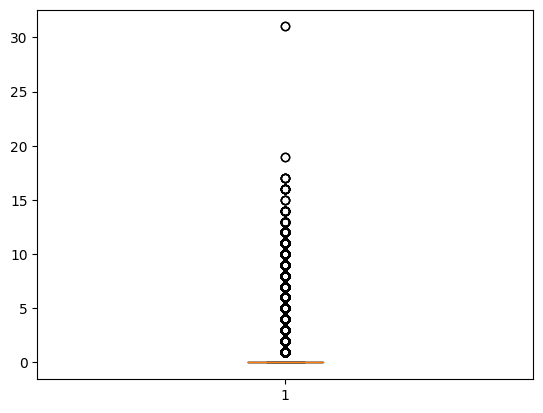

In [110]:
import matplotlib.pyplot as plt
plt.boxplot(num_list)

In [69]:
pos

4990

In [70]:
neg

12

In [112]:
used_titles = set()
keyword2title_list = dict()
for record in media_cl:
    title = record['title']
    seg_list = list(set(jieba.cut(title)))
    for keyw in seg_list:
        if len(keyw) >1:
            if keyw not in keyword2title_list:
                keyword2title_list[keyw] = []
            keyword2title_list[keyw].append(title)
            used_titles.add(title)
keyword4title_list = list(keyword2title_list.items())
keyword4num = sorted([[keyw, len(ts)] for keyw, ts in keyword4title_list if len(ts) > 1], reverse=False, key=lambda x:x[1])

In [113]:
len(keyword4num)

3816

In [114]:
keyword4num[:100]

[['大鸡', 2],
 ['挨操', 2],
 ['富婆', 2],
 ['白富', 2],
 ['网衣', 2],
 ['津津有味', 2],
 ['坏掉', 2],
 ['蒙面', 2],
 ['小麦', 2],
 ['深渊', 2],
 ['填满', 2],
 ['黑鬼', 2],
 ['格罗', 2],
 ['羞辱', 2],
 ['肚子', 2],
 ['抖奶', 2],
 ['骑坐', 2],
 ['雪白', 2],
 ['喊爽', 2],
 ['狩猎', 2],
 ['无良', 2],
 ['两腿', 2],
 ['睡前', 2],
 ['操着', 2],
 ['圣诞节', 2],
 ['河南', 2],
 ['哥特', 2],
 ['宜家', 2],
 ['女主角', 2],
 ['湿漉漉', 2],
 ['甜点', 2],
 ['集体', 2],
 ['激突', 2],
 ['硬干', 2],
 ['伴娘', 2],
 ['新郎', 2],
 ['贵气', 2],
 ['男轮', 2],
 ['导师', 2],
 ['真人版', 2],
 ['车展', 2],
 ['小胖', 2],
 ['房东太太', 2],
 ['纯情', 2],
 ['湾湾', 2],
 ['遭到', 2],
 ['僵尸', 2],
 ['骚妹', 2],
 ['孕妇', 2],
 ['太久', 2],
 ['炮机', 2],
 ['她家', 2],
 ['厚实', 2],
 ['阳台', 2],
 ['任务', 2],
 ['间谍', 2],
 ['新买', 2],
 ['柜姐', 2],
 ['地上', 2],
 ['上来', 2],
 ['绿发', 2],
 ['面具', 2],
 ['滨江', 2],
 ['两女一男', 2],
 ['红唇', 2],
 ['两穴', 2],
 ['爽操', 2],
 ['单车', 2],
 ['魔法', 2],
 ['私生活', 2],
 ['风情', 2],
 ['闲着', 2],
 ['28', 2],
 ['玩完', 2],
 ['特大', 2],
 ['操控', 2],
 ['無法', 2],
 ['西洋', 2],
 ['吸奶', 2],
 ['合法', 2],
 ['极萌', 2],
 ['这大', 2],
 ['应酬

In [18]:
len(keyword4num)

10361

In [10]:
pos , neg = 0,0
for record in media_cl:

    if len(record['tags-data']) > 0 :
        pos +=1
    else:
        neg +=1

In [11]:
pos

2963

In [12]:
neg

2039